# Predicting Sin Wave by using Simple RNN

In this tutorial, you will understand how RNN can predict sin wave. We will use [Keras](https://keras.io/), a high-level API for deep learning, which is a wrapper of TensorFlow, CNTK, or Theano. Keras was developed with a focus on enabling fast experimentation, which makes this framework easy to use and learn deep learning.

__All the libraries used in this tutorial are <font color='red'>Open Source</font>__.

In [1]:
# Standard libraries - no deep learning yet
import math # standard library, provides functions such as for trigonometry and logarithms as well as constants.
import numpy as np # written in C, is faster and robust library for numerical and matrix operations
import pandas as pd # data manipulation library, it is widely used for data analysis and relies on numpy library.
import matplotlib.pyplot as plt # for plotting

from utils import * # this will load all the utils functions implements for this tutorial

# the following to lines will tell to the python kernel to alway update the kernel for every utils.py
# modification, without the need of restarting the kernel.
# Of course, for every motification in util.py, we need to reload this cell
%load_ext autoreload
%autoreload 2

# If you see some RuntimeWarning, just ignore them.

## Creating sin data

Here we will create the sin data. The function __create_sin_data__ (see _utils.py) will use the function [np.sin](https://docs.scipy.org/doc/numpy-1.10.4/reference/generated/numpy.sin.html) from numpy and store the data in a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) format, which is an efficient tabular data-structure provided by [pandas](https://pandas.pydata.org/) library.

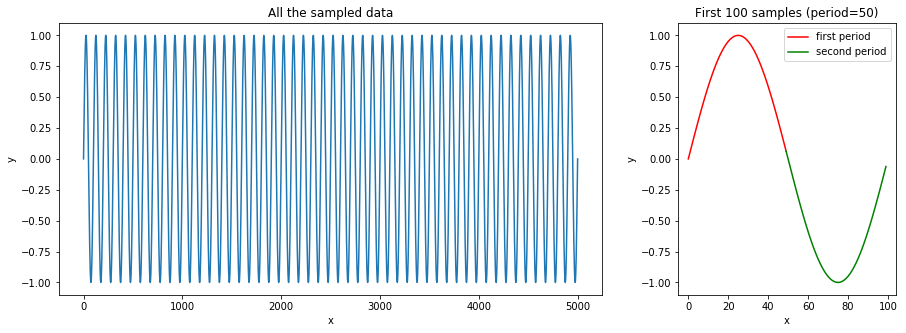

In [2]:
# Creating the sin data, this returns a DataFrame
series = create_sin_data(samples=5000, period=50)

# Visualising the series
f, (ax0, ax1) = plt.subplots(1,2, figsize = (15, 5), gridspec_kw = {'width_ratios':[5, 2]})

# Ploting the sampled data
   # series.values returns a numpy representation of the DataFrame
ax0.plot(series.values)
ax0.set_xlabel("x")
ax0.set_ylabel("y")
ax0.set_title("All the sampled data")

# Ploting the first PERIOD of the sampled data
  # series.values returns a numpy representation of the DataFrame, by doing series.values[:PERIOD], we are 
  # taking the first 50 samples in the numpy.array representation
ax1.plot(range(50),series.values[:50], 'r', label='first period')
ax1.set_xlabel("x")
ax1.set_ylabel("y")


  # series.values returns a numpy representation of the DataFrame, by doing series.values[:PERIOD], we are 
  # taking the second 50 samples in the numpy.array representation
ax1.plot(range(49, 100), series.values[49:100], 'g', label='second period')
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("First {} samples (period=50)".format(100))
ax1.legend(loc="upper right")

plt.show()

### Pandas Tasting

Pandas is a very powerfull library for data manipulation, it is widely used by the community as a data science tools. It provides a number of built-in functions that makes easy the data understanding and visualisation. 

Pandas is beyond this tutorial, but just for a tasting (more info see [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)), we will do some analysis of the sin data.

In [3]:
# checking the first 10 values of the sampled data
print('First 10 samples:')
print(series[:10]) # note that, if we don't call series.values, we are not using numpy array, i.e., by  
                   # doing series[:10] we are slicing the data frame structure
    
print('\nAnalysing the types')
print('  -series[:10] type: ',type(series[:10]))
print('  -series.values[:10] type: ',type(series.values[:10]))

First 10 samples:
              0
0 -9.821934e-16
1  6.280306e-02
2  1.253582e-01
3  1.874184e-01
4  2.487386e-01
5  3.090768e-01
6  3.681947e-01
7  4.258589e-01
8  4.818418e-01
9  5.359223e-01

Analysing the types
  -series[:10] type:  <class 'pandas.core.frame.DataFrame'>
  -series.values[:10] type:  <class 'numpy.ndarray'>


__As you can see, the data type of series.values is different from series, remember always that :)__

In [4]:
# as series[:10] still a DataFrame, you can just so series[:10] to print the values, pandas
# will create a 'Cascading Style Sheets - CSS' based layout 
series[:10]

,0
0,-9.821934e-16
1,6.280306e-02
2,1.253582e-01
3,1.874184e-01
4,2.487386e-01
5,3.090768e-01
6,3.681947e-01
7,4.258589e-01
8,4.818418e-01
9,5.359223e-01


In [5]:
# There a lot of function that we can use, for example we can compute the mean and variance
print('Mean: ', series.mean()[0]) # include the index [0] to show just the mean. 
                                  #Otherwise, will show the index as well
print('Variance:', series.var()[0])
# or even the cumsum of the series
print('Cumsum:', series.cumsum()[:10])

Mean:  -9.237055564881302e-18
Variance: 0.5000000000000001
Cumsum:               0
0 -9.821934e-16
1  6.280306e-02
2  1.881612e-01
3  3.755796e-01
4  6.243182e-01
5  9.333949e-01
6  1.301590e+00
7  1.727449e+00
8  2.209290e+00
9  2.745213e+00


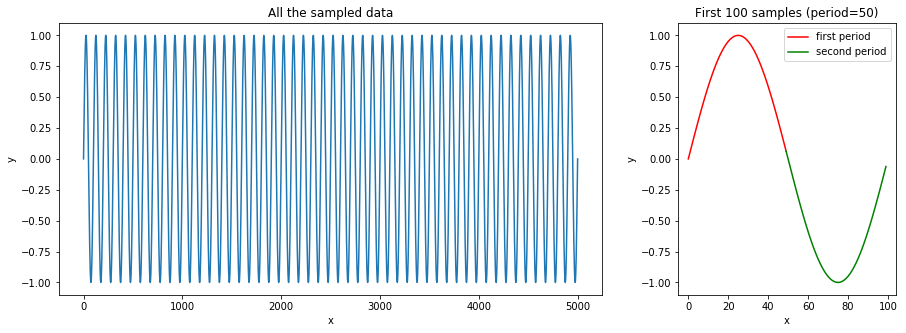

In [6]:
# Besides that, you can even plot the sample in the Dataframe as we did in visualisation cell above. Here, 
# instead us series.values we can use directly series.plot the values. As we would like to do subplot, we can 
# use the following code to plot to series.plot together.

f, (ax0, ax1) = plt.subplots(1,2, figsize = (15, 5), gridspec_kw = {'width_ratios':[5, 2]})
ax0.set_xlabel("x")
ax0.set_ylabel("y")
ax0.set_title("All the sampled data")

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("First {} samples (period=50)".format(100))


# here, instead use series value, we just define the slice the we would like to visualise
# and call for this slice the built-in function, in this case plot(). To select the 
# where each plot will be visualised, we need to specify the paramer 'ax'.
series.plot(ax=ax0,legend=False)
series[:50].plot(ax=ax1, color='r')
series[49:100].plot(ax=ax1, color='g')
# plot label paramers in pandas doesn't work properly, so we include the legend by doing:
ax1.legend(["first period", "second period"])

__Along this tutorial, we will use other Pandas functions as well!__

## Creating the Windowed Data Set

To window the dataset, we created the function __create_window__ (see _utils.py_), this fixes _window_\__size_ and  uses pandas [shift](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html) function. The function shift shifts an entire column by a given number. In our case, we shifted the column up by 1 and then concatenate that to the original data.

In [7]:
# Performing the sliding window (window_size=5) with drop_nan = False. 
series_backup = series.copy()
t = create_window(series_backup, window_size = 5)
# show the last 5 elements in the DataFrame (dataframe.tail can be used for this propose)
t.tail()

,0,0,0,0,0,0
4995,-2.487386e-01,-1.874184e-01,-1.253582e-01,-6.280306e-02,9.821934e-16,NaN
4996,-1.874184e-01,-1.253582e-01,-6.280306e-02,9.821934e-16,NaN,NaN
4997,-1.253582e-01,-6.280306e-02,9.821934e-16,NaN,NaN,NaN
4998,-6.280306e-02,9.821934e-16,NaN,NaN,NaN,NaN
4999,9.821934e-16,NaN,NaN,NaN,NaN,NaN


As you can see in the table above, a lot of NaN where included in the dataset, in order to remove these value we will set _drop_nan_ = True. This will allow us to use pandas function [dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

In [8]:
# Performing the sliding window (window_size=5) with drop_nan = True. 
series_backup = series.copy()
t = create_window(series_backup, window_size = 5, drop_nan=True)
# print the last 5 elements in the DataFrame (dataframe.tail can be used for this propose)
t.tail()

,0,0,0,0,0,0
4990,-0.535922,-0.481842,-0.425859,-0.368195,-0.309077,-2.487386e-01
4991,-0.481842,-0.425859,-0.368195,-0.309077,-0.248739,-1.874184e-01
4992,-0.425859,-0.368195,-0.309077,-0.248739,-0.187418,-1.253582e-01
4993,-0.368195,-0.309077,-0.248739,-0.187418,-0.125358,-6.280306e-02
4994,-0.309077,-0.248739,-0.187418,-0.125358,-0.062803,9.821934e-16


For now, we can ignore the **column_names** (all of the are zero). They will not play any role in this tutorial, however, if you would like to change them,| click in [this link](https://chrisalbon.com/python/data_wrangling/pandas_rename_multiple_columns/) for more information.

In [9]:
# Print the first 5 elements by using dataframe.head()
t.head()

,0,0,0,0,0,0
0,-9.821934e-16,0.062803,0.125358,0.187418,0.248739,0.309077
1,6.280306e-02,0.125358,0.187418,0.248739,0.309077,0.368195
2,1.253582e-01,0.187418,0.248739,0.309077,0.368195,0.425859
3,1.874184e-01,0.248739,0.309077,0.368195,0.425859,0.481842
4,2.487386e-01,0.309077,0.368195,0.425859,0.481842,0.535922


# Building the Model

So far, we just created the dataset and showed how we can use pandas for data manipulation. Now, we will preprocess the data and build a __simple RNN__ model. 

For [Keras](https://keras.io/), we will using [Tensorflow](https://www.tensorflow.org/) backend by default

For basic machine learning tasks, we will using the library [Scikit-learn](http://scikit-learn.org/stable/), which is a very powerful machine learning library for Python.

In [10]:
# Loading the libraries required for this step.
# keras components, we will describe each one along this tutorial, so don't be worry 
from keras.models import Sequential
from keras.layers.recurrent import SimpleRNN
from keras.layers.core import Dense, Activation

# Scikit learn libraries
from sklearn.preprocessing import MinMaxScaler # allows normalisation
from sklearn.metrics import mean_squared_error # allows compute the mean square error to performance analysis

Using TensorFlow backend.


## Data Pre-processing

First, we will normalise the dataset on the (-1,1) interval by using the function [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [11]:
# creating the dataset
series = create_sin_data(samples=5000, period=50)

# normalising the data
scaler = MinMaxScaler(feature_range = (-1, 1)) 

# Note that below we are normalising the series.values (numpy array data) and not 
# series (DataFrame data)
scaled = scaler.fit_transform(series.values) 

# Convert scaled (numpy.array) to DataFrame.
series = pd.DataFrame(scaled)

__<font color='red'>Take away:</font>__ scikit-learn doesn't support pandas structure such as DataFrames (at least dated date of this tutorial), so we __can't__ use DataFrames with scikit-learn. But, we can use numpy.arrays.

In [12]:
# Windowing the dataset
window_size = 50

# you can also try drop_nan = False just to see the series_w.tail() result.
series_w = create_window(series, window_size, drop_nan = True)

# Visualising the first 5 samples
series_w.head()

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-9.821934e-16,0.062803,0.125358,0.187418,0.248739,0.309077,0.368195,0.425859,0.481842,0.535922,...,0.535392,0.481291,0.425290,0.367610,0.308479,0.248130,0.186801,0.124735,0.062176,-0.000628
1,6.280307e-02,0.125358,0.187418,0.248739,0.309077,0.368195,0.425859,0.481842,0.535922,0.587887,...,0.481291,0.425290,0.367610,0.308479,0.248130,0.186801,0.124735,0.062176,-0.000628,-0.063430
2,1.253582e-01,0.187418,0.248739,0.309077,0.368195,0.425859,0.481842,0.535922,0.587887,0.637531,...,0.425290,0.367610,0.308479,0.248130,0.186801,0.124735,0.062176,-0.000628,-0.063430,-0.125982
3,1.874184e-01,0.248739,0.309077,0.368195,0.425859,0.481842,0.535922,0.587887,0.637531,0.684657,...,0.367610,0.308479,0.248130,0.186801,0.124735,0.062176,-0.000628,-0.063430,-0.125982,-0.188036
4,2.487386e-01,0.309077,0.368195,0.425859,0.481842,0.535922,0.587887,0.637531,0.684657,0.729081,...,0.308479,0.248130,0.186801,0.124735,0.062176,-0.000628,-0.063430,-0.125982,-0.188036,-0.249347


In [13]:
series_w.tail()

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4945,0.249347,0.188036,0.125982,0.063430,0.000628,-0.062176,-0.124735,-0.186801,-0.248130,-0.308479,...,-0.729081,-0.684657,-0.637531,-0.587887,-0.535922,-0.481842,-0.425859,-0.368195,-0.309077,-2.487386e-01
4946,0.188036,0.125982,0.063430,0.000628,-0.062176,-0.124735,-0.186801,-0.248130,-0.308479,-0.367610,...,-0.684657,-0.637531,-0.587887,-0.535922,-0.481842,-0.425859,-0.368195,-0.309077,-0.248739,-1.874184e-01
4947,0.125982,0.063430,0.000628,-0.062176,-0.124735,-0.186801,-0.248130,-0.308479,-0.367610,-0.425290,...,-0.637531,-0.587887,-0.535922,-0.481842,-0.425859,-0.368195,-0.309077,-0.248739,-0.187418,-1.253582e-01
4948,0.063430,0.000628,-0.062176,-0.124735,-0.186801,-0.248130,-0.308479,-0.367610,-0.425290,-0.481291,...,-0.587887,-0.535922,-0.481842,-0.425859,-0.368195,-0.309077,-0.248739,-0.187418,-0.125358,-6.280307e-02
4949,0.000628,-0.062176,-0.124735,-0.186801,-0.248130,-0.308479,-0.367610,-0.425290,-0.481291,-0.535392,...,-0.535922,-0.481842,-0.425859,-0.368195,-0.309077,-0.248739,-0.187418,-0.125358,-0.062803,9.821934e-16


In [14]:
print("Shape of input data: {}".format(series_w.shape))

Shape of input data: (4950, 51)


## Spliting the Data into Training and Test Dataset

First we need to split our dataset into training and dataset, as described below.

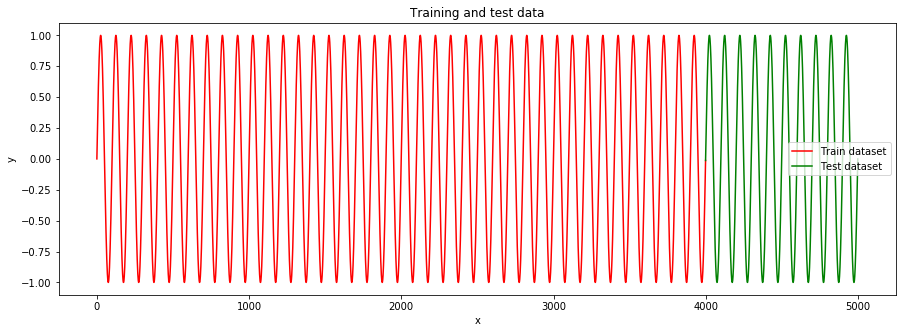

In [15]:
# First, let's visualise how our splitted dataset will like. For our better understading, 
# here we will plot the non-windowed data.

# we are using the function implemented in utils.py. We defined 80% to be used for training and 20% 
# for testing
plot_training_test_data(series, train_size=0.8)

In [16]:
# Spliting the data into 80% of data for training and 20% of data for testing
train_X, train_Y, test_X, test_Y = train_test_split(series_w, train_size=0.8, shuffle=False)

print("Training set shape: :")
print("  - X (inputs)", train_X.shape)
print("  - Y (output):", train_Y.shape)
print("\nTresting set shape: :")
print("  - X (inputs)", test_X.shape)
print("  - Y (output):", test_Y.shape)

Training set shape: :
  - X (inputs) (3960, 50)
  - Y (output): (3960,)

Tresting set shape: :
  - X (inputs) (990, 50)
  - Y (output): (990,)


In [17]:
# The function train_test_split return 2D arrays, however, we will use tensor representation,
# in which the third dimension is the number of the batch. To fix the shape, we use 
# the numpy.reshape (https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)
# function, as follows 
train_X = np.reshape(train_X.values, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X.values, (test_X.shape[0], test_X.shape[1], 1))

print("Fixed shape: :")
print("  - Training dataset: ", train_X.shape)
print("  - Testing dataset: ", test_X.shape)

Fixed shape: :
  - Training dataset:  (3960, 50, 1)
  - Testing dataset:  (990, 50, 1)


Note that now _train_\__X_ and _text_\__X_ are numpy.array.

## Basic RNN Model

We will build a model based on a simple (basic) RNN. Our model we consist in a **many_to_one** architecture, in which our input is the **window_size** and our output is the predicted value (dimension 1). The Figure below illustrates how our model will look like, note that each _RNN Cell_ is as described in the lecture, so we will have 50 (window size) cells in our model.

![rnn_type](imgs/sin_wave_rnn_type.png)

To build the model, we will use the following components from Keras:

 - [Sequencial](https://keras.io/models/sequential/): allows us to create models layer-by-layer. 
 - [SimpleRNN](https://keras.io/layers/recurrent/): provides a Basic (simple) RNN architecture
 - [Dense](https://keras.io/layers/core/): provides a regular fully-connected layer
 - [Activation](https://keras.io/activations/): defines the activation function to be used

Basically, we will defined the sequence of our model by using _Sequential()_, include the layers:

```
    model = Sequential()
    model.add(SimpleRNN(...))
    ...
```
and, once created the model we will configure the model for training by using the built-in method [compile](https://keras.io/models/model/), in which we will define the [loss](https://keras.io/losses/) function (mean squared error, mean absolute error, cosine proximity, among others.) and the [optimizer](https://keras.io/optimizers/) (Stochastic gradient descent, RMSprop, adam, among others), as follows:

```
    model.compile(loss = "...", 
                  optimizer = "...")
```

Also, we have the option to see a summary representation of our model by using the build-in function [summary](https://keras.io/models/about-keras-models/#about-keras-models).

In [18]:
# Define the model.
model_rnn = Sequential()

# The input shape is the number of inputs per windows size (windows_size,1)
# we will need to define the number of units.

# The activation function for each cell, by default, is 'tanh' (activation='tanh').
# Finally, we need to set return_sequences = False (by default is True). This parameter
# is quite important because determines whether to return the last output in the output sequence, 
# or the full sequence. As we are using a many_to_one architecture, we are interested in the last
# output. Note that the output will be the same shape of the units, for instance if  units
# is equal 4, we will have an output array with four elements that represent the weights to be used
# by the fully-connect (dense) layer that will generate the predicted output (y_hat), see the code below.
model_rnn.add(SimpleRNN(input_shape = (window_size, 1), 
                        units = 64, # try here with 2 or 4 units and check the performance of the model
                        return_sequences = False))
model_rnn.add(Dense(units=1)) # in which units is dimensionality of the output space, our case 1 
                              # (we will predict the next value). By default, the activation function is 
                              # linear

# We compile the model by defining the mean squared error (denoted by mse) as loss function and
# adam as optimizer
model_rnn.compile(loss = "mse", 
                  optimizer = "adam")

# just print the model
model_rnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 64)                4224      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


Once defined the model, we can train it by using the built-in function [fit](https://keras.io/models/model/). This trains the model for a given number of epochs. Also we can define other parameters such as:

 - batch size
 - epochs
 - validation split, which define the percentage of training data to be using for validation
 - among others (click [here](https://keras.io/models/model/) for more information)
 
This function return the _history_ of the training, that can be used for further performance analysis.

In [19]:
# training the model
history = model_rnn.fit(train_X, 
                          train_Y, 
                          batch_size = 512,
                          epochs = 10,
                          validation_split = 0.1)

Train on 3564 samples, validate on 396 samples
Epoch 1/10
3564/3564 [==============================] - 0s 82us/step - loss: 0.1219 - val_loss: 0.0264
Epoch 2/10
3564/3564 [==============================] - 0s 32us/step - loss: 0.0172 - val_loss: 0.0065
Epoch 3/10
3564/3564 [==============================] - 0s 34us/step - loss: 0.0081 - val_loss: 0.0018
Epoch 4/10
3564/3564 [==============================] - 0s 31us/step - loss: 0.0034 - val_loss: 0.0042
Epoch 5/10
3564/3564 [==============================] - 0s 31us/step - loss: 0.0021 - val_loss: 0.0012
Epoch 6/10
3564/3564 [==============================] - 0s 31us/step - loss: 0.0014 - val_loss: 7.9087e-04
Epoch 7/10
3564/3564 [==============================] - 0s 30us/step - loss: 7.7689e-04 - val_loss: 6.9955e-04
Epoch 8/10
3564/3564 [==============================] - 0s 30us/step - loss: 5.0451e-04 - val_loss: 4.8344e-04
Epoch 9/10
3564/3564 [==============================] - 0s 30us/step - loss: 3.8559e-04 - val_loss: 2.6773e-0

### Using the history 

Here we can see if the model overfits or underfits

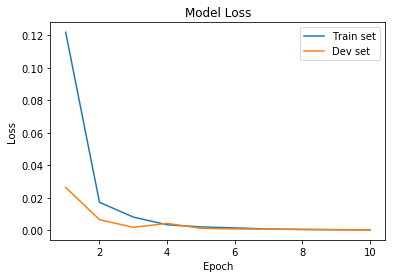

In [20]:
plot_loss(history)

### Prediction and Performance Analysis

Once the model was trained, we can use the built-in function [predict](https://keras.io/models/model/) to do some predictions.

In [21]:
# Prediction on test data.
pred_test = model_rnn.predict(test_X)

# In order to use to right data, first we need to use the inverse transformation to get back true values.
# this can be done by using the method inverse_transform provided by the component MinMaxScaler
# (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
test_y_actual = scaler.inverse_transform(test_Y.values.reshape(test_Y.shape[0], 1))

# Computing the mean squared error of of the test data against the predicted data
model_rnn_mse = mean_squared_error(test_y_actual, pred_test)
print("MSE for predicted test set: %2f" % model_rnn_mse)

MSE for predicted test set: 0.000211


### Visualising the predicted Data

Here, we plot the test data against the the predicted data.

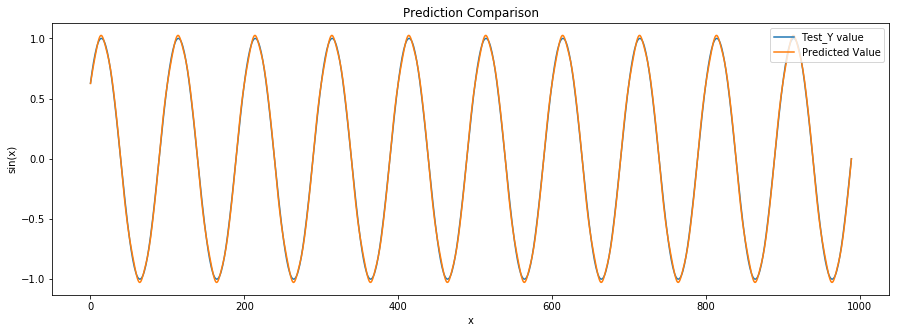

In [22]:
plot_comparison(test_y_actual, pred_test, series_1_label='Test_Y value',
                    series_2_label='Predicted Value', title='Prediction Comparison')

## Model Understanding: What are the model weights and hidden units?

In order to understand the model, let's have a look the shapes of the weights and the hidden units.

For the SimpleRNN:
 - weights[0] is the input matrix and has a shape [input_dim, output_dim]
 - weights[1] is the weight matrix and has a shape [output_dim, output_dim]
 - weights[2] is the bias matrix and has a shape [output_dim]
 
For the fully-connected layer (Dense):
 - weights[0] is the weight matrix and has shape [output_dim, output_dim]
 - weights[1] is the bias matrix and has a shape [output_dim]
 
For the hidden units:
 - The shape must be the same shape of the test set, i.e., if the shape of the test set it 100 we will have 100 hidden units in the prediction stage

In [23]:
print('Number of layers: ', len(model_rnn.layers))

weights = {}
layers = [] 
for layer in model_rnn.layers:
    weights[layer.name] = layer.get_weights()
    layers.append(layer.name)

hidden_units = model_rnn.predict(test_X).flatten()
    
print('Weights shape:')

# we know that we have just two layers: SimpleRNN and Dense
print(" ", layers[0])
print("    Input: ",weights[layers[0]][0].shape)
print("    Weights (W_hh): ",weights[layers[0]][1].shape)
print("    Bias (b_h): ",weights[layers[0]][2].shape)

print(" ", layers[1])
print("    Weights (W_yh): ",weights[layers[1]][0].shape)
print("    Bias (b_y): ",weights[layers[1]][1].shape)

print('\nHidden units shape: ', hidden_units.shape, ' and the shape of the test_X is ', test_X.shape[0])

Number of layers:  2
Weights shape:
  simple_rnn_1
    Input:  (1, 64)
    Weights (W_hh):  (64, 64)
    Bias (b_h):  (64,)
  dense_1
    Weights (W_yh):  (64, 1)
    Bias (b_y):  (1,)

Hidden units shape:  (990,)  and the shape of the test_X is  990


# Another Way to Create Models

So far we see how create a RNN model in Keras by using the **Sequential** API. However, this API is limited, it does not allow us to create models that share layers or have multiple inputs or outputs. 
For example, it is not easy to define models that may have:

 - multiple different input sources,
 - produce multiple output destinations, or
 - models that re-use layers.
 
Another way to create a model is by using the [**Functional**](https://keras.io/getting-started/functional-api-guide/) API. This API allows us to create a more robust model, which more flexibility and fredoom do define and re-use layers. This allow us do define complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.

The use of **Functional API** is beyond this tutorial, however it is well documented can be found [here](https://keras.io/getting-started/functional-api-guide/).